In [12]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

train_features_raw = pd.read_csv('/home/xyk/data/Downloads/PTA/split_data/train_features.csv')
train_labels_raw = pd.read_csv('/home/xyk/data/Downloads/PTA/split_data/train_labels.csv')

train_features_raw.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transform,Title,Cabin_indicator,Family
count,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,2.296629,0.649438,29.211583,0.546067,0.431461,33.959971,129.065169,1.561798,29.257517,2.543820,32.682157,1.830090,10.249438,0.233708,0.977528
std,0.834024,0.477683,14.154300,1.195247,0.850489,52.079492,38.262933,0.782049,12.573095,0.794683,42.966963,0.412030,1.762543,0.423665,1.735802
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,2.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.000000,0.000000,0.000000,7.925000,147.000000,1.000000,22.000000,2.000000,7.925000,1.512864,8.000000,0.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,15.000000,147.000000,2.000000,29.699118,3.000000,15.000000,1.718772,11.000000,0.000000,0.000000
75%,3.000000,1.000000,37.250000,1.000000,1.000000,31.387500,147.000000,2.000000,35.000000,3.000000,31.387500,1.992284,11.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,5.000000,512.329200,147.000000,3.000000,65.000000,3.000000,249.006220,3.014686,16.000000,1.000000,10.000000


In [13]:
train_features = pd.DataFrame(data=train_features_raw, columns=['Pclass', 'Sex', 'Age_clean', 'Family', 'Fare_clean_transform', 'Cabin', 'Embarked_clean'])
train_labels = pd.DataFrame(data=train_labels_raw)

train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pclass                445 non-null    int64  
 1   Sex                   445 non-null    int64  
 2   Age_clean             445 non-null    float64
 3   Family                445 non-null    int64  
 4   Fare_clean_transform  445 non-null    float64
 5   Cabin                 445 non-null    int64  
 6   Embarked_clean        445 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 24.5 KB


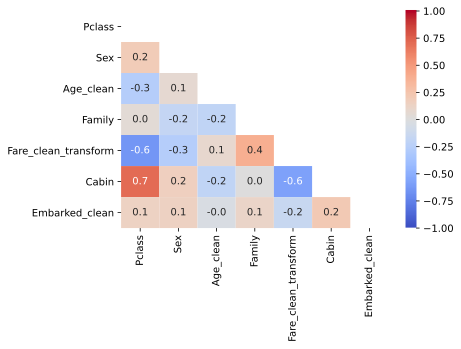

In [14]:
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [15]:

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [16]:
np.isnan(train_features).any()

Pclass                  False
Sex                     False
Age_clean               False
Family                  False
Fare_clean_transform    False
Cabin                   False
Embarked_clean          False
dtype: bool

In [17]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 8}

0.793 (+/-0.018) for {'max_depth': 2, 'n_estimators': 8}
0.782 (+/-0.079) for {'max_depth': 2, 'n_estimators': 16}
0.773 (+/-0.064) for {'max_depth': 2, 'n_estimators': 32}
0.773 (+/-0.082) for {'max_depth': 2, 'n_estimators': 64}
0.76 (+/-0.063) for {'max_depth': 2, 'n_estimators': 128}
0.757 (+/-0.1) for {'max_depth': 2, 'n_estimators': 256}
0.762 (+/-0.093) for {'max_depth': 2, 'n_estimators': 512}
0.809 (+/-0.075) for {'max_depth': 4, 'n_estimators': 8}
0.804 (+/-0.042) for {'max_depth': 4, 'n_estimators': 16}
0.798 (+/-0.038) for {'max_depth': 4, 'n_estimators': 32}
0.807 (+/-0.063) for {'max_depth': 4, 'n_estimators': 64}
0.802 (+/-0.06) for {'max_depth': 4, 'n_estimators': 128}
0.802 (+/-0.073) for {'max_depth': 4, 'n_estimators': 256}
0.798 (+/-0.074) for {'max_depth': 4, 'n_estimators': 512}
0.771 (+/-0.065) for {'max_depth': 8, 'n_estimators': 8}
0.804 (+/-0.089) for {'max_depth': 8, 'n_estimators': 16}
0.796 (+/-0.097) for {'

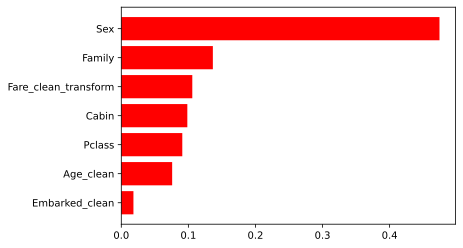

In [18]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [19]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

/home/xyk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/xyk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

BEST PARAMS: {'C': 1}

0.676 (+/-0.074) for {'C': 0.001}
0.69 (+/-0.076) for {'C': 0.01}
0.791 (+/-0.087) for {'C': 0.1}
0.798 (+/-0.068) for {'C': 1}
0.793 (+/-0.068) for {'C': 10}
0.798 (+/-0.062) for {'C': 100}
0.789 (+/-0.067) for {'C': 1000}


In [20]:
'''
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)
'''

"\nsvc = SVC()\nparameters = {\n    'kernel': ['linear', 'rbf'],\n    'C': [0.1, 1, 10]\n}\n\ncv = GridSearchCV(svc, parameters, cv=5)\ncv.fit(train_features, train_labels.values.ravel())\n\nprint_results(cv)\n"

In [21]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

/home/xyk/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xyk/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xyk/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xyk/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xyk/anaconda3/lib/python3.8/site-packages/skle

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.69 (+/-0.117) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.647 (+/-0.129) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.661 (+/-0.104) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.773 (+/-0.064) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.764 (+/-0.117) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.769 (+/-0.077) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.773 (+/-0.07) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.775 (+/-0.114) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.789 (+/-0.059) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learnin

In [22]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.598 (+/-0.009) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.791 (+/-0.065) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.791 (+/-0.065) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.802 (+/-0.061) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.598 (+/-0.009) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.773 (+/-0.044) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.807 (+/-0.078) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.811 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.598 (+/-0.009) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.787 (+/-0.049) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.796 (+/-0.096) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.787 (+/-0.1) for {'learning_ra